# Predicción de Deserción Estudiantil con Redes Neuronales

Este notebook permite predecir la deserción estudiantil en Instituciones de Educación Superior (IES).
Se basa en 4 variables, pero puede ser expandido para usar las que la institución considere necesarias, siempre y cuando haga una estandarización de los grupos de datos(1 o 0 por columnas).
Las dimensiones originalmente contempladas en este notebook son:

- Económica
- Personal y familiar
- Institucional
- Académica

El dataset original está basado en la base SPADIES de 2016 pero es solamente para propósito de pruebas, y se espera que las IES determinen los valores para estas dimensiones o establezcan nuevas.

Para cargar los dataset se usan dos librerías, Pandas y numpy, sobre los cuales se puede encontrar documentación en estos sitios de referencia:
- https://pandas.pydata.org/pandas-docs/stable/
- https://numpy.org/doc/
Para las redes neuronales se usaron un algoritmo Adeline sencillo, escrito en código, y la librería scikit de la cual se pueden encontrar ejemplos de uso en esta página:
- https://scikit-learn.org/stable/user_guide.html

Se pueden usar las implementaciones de ejemplo de cada algoritmo y con la configuración de los hiperparámetros se puede determinar el algoritmo más conveniente y preciso.
Los algoritmos implementados aquí son: Perceptrón multicapa, Perceptrón regresor multicapa y Random Forest


## Importante
Las librerías pandas, numpy y scikit deben ser instaladas en el ambiente del notebook para que funcione. 
Se sugiere usar pip para hacer la instalación mediante el comando: 'pip install "librería"', por ejemplo: pip install pandas

In [1]:
# Importando pandas y numpy
import pandas as pd
import numpy as np

# leyendo el dataset
data = pd.read_csv('Datos_estudiantes.csv')

# Valida la carga de datos
data.head()


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Opcional
## Dibujando los datos

Vamos a dibujar la data para ver cómo luce, vamos a tomar dos dimensiones originalmente

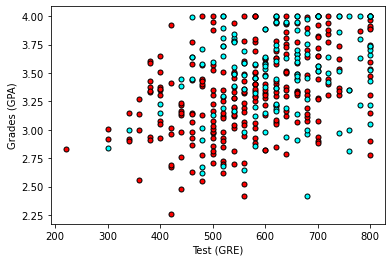

In [3]:
import matplotlib.pyplot as plt

def plot_points(data):
    X = np.array(data[["economica","personal"]])
    y = np.array(data["deserta"])
    desertor = X[np.argwhere(y==1)]
    continua = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in continua], [s[0][1] for s in continua], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in desertor], [s[0][1] for s in desertor], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('D. Economica')
    plt.ylabel('D. Familiar')
    
plot_points(data)
plt.show()

Normalmente no son fácilmente separables los grupos de desertores de los que continuan.

## Codificar los datos en binario

Una vez que tenemos un rango de valores, por ejemplo Institucional, con valores 1 a 4
Use la función `get_dummies` de pandas para codificar en valores 0 o 1 en columnas correspondientes a los posibles valores de la dimensión. 

Finalmente, elimine la columna codificada usando la función `drop`. 
Para más información:(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html).

In [2]:
# one_hot_data va a tener la data codificada
one_hot_data = data[:]

# crear columnas codificadas
one_hot_data = pd.concat( [one_hot_data, pd.get_dummies(one_hot_data['institucional'], prefix = 'institucional')], axis=1)
one_hot_data.drop(["institucional"], axis=1, inplace=True)

# verificar la data
one_hot_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## Escalar los datos

El siguiente paso es escalar los datos. En este dataset ya se ha hecho un proceso de filtrado que genera unos rangos para los valores de cada dimensión. El proceso de escalamiento, separa estos valores y los deja en columnas con valores 1 o 0, para que las redes neuronales puedan utilizarlos adecuadamente.

In [3]:
# Se copia el dataset
processed_data = one_hot_data[:]

# Escalado de columnas
processed_data["economica"] = np.round(processed_data["economica"]).astype(int)
print(processed_data.head(10))

processed_data = pd.concat( [processed_data, pd.get_dummies(processed_data['economica'], prefix = 'economica')], axis=1)
processed_data.drop(["economica"], axis=1, inplace=True)

processed_data["personal"] = np.round(processed_data["personal"]/200).astype(int)
print(processed_data.head(10))
processed_data = pd.concat( [processed_data, pd.get_dummies(processed_data['personal'], prefix = 'personal')], axis=1)
processed_data.drop(["personal"], axis=1, inplace=True)

# validando los resultados
processed_data.head(15)

   admit  gre  gpa  rank_1  rank_2  rank_3  rank_4
0      0  380    4       0       0       1       0
1      1  660    4       0       0       1       0
2      1  800    4       1       0       0       0
3      1  640    3       0       0       0       1
4      0  520    3       0       0       0       1
5      1  760    3       0       1       0       0
6      1  560    3       1       0       0       0
7      0  400    3       0       1       0       0
8      1  540    3       0       0       1       0
9      0  700    4       0       1       0       0
   admit  gre  rank_1  rank_2  rank_3  rank_4  gpa_2  gpa_3  gpa_4
0      0    2       0       0       1       0      0      0      1
1      1    3       0       0       1       0      0      0      1
2      1    4       1       0       0       0      0      0      1
3      1    3       0       0       0       1      0      1      0
4      0    3       0       0       0       1      0      1      0
5      1    4       0       1       0

,admit,rank_1,rank_2,rank_3,rank_4,gpa_2,gpa_3,gpa_4,gre_1,gre_2,gre_3,gre_4
0,0,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0,1,0
2,1,1,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0
5,1,0,1,0,0,0,1,0,0,0,0,1
6,1,1,0,0,0,0,1,0,0,0,1,0
7,0,0,1,0,0,0,1,0,0,1,0,0
8,1,0,0,1,0,0,1,0,0,0,1,0
9,0,0,1,0,0,0,0,1,0,0,0,1


## Dividiendo la data en entrenamiento y pruebas

Para entrenar el modelo y poder probarlo. se divide el dataset entre dos grupos: entrenamiento y pruebas.

In [4]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("El número de registros para entrenamiento es:", len(train_data))
print(train_data[:10])
print("El número de registros para prueba es:", len(test_data))
print(test_data[:10])

Number of training samples is 360
     admit  rank_1  rank_2  rank_3  rank_4  gpa_2  gpa_3  gpa_4  gre_1  gre_2  \
212      0       0       1       0       0      0      1      0      0      1   
92       0       0       1       0       0      0      0      1      0      0   
240      0       0       1       0       0      0      1      0      0      1   
213      0       0       0       1       0      0      1      0      0      0   
72       0       0       0       0       1      0      1      0      0      1   
389      0       0       1       0       0      0      0      1      0      0   
90       0       0       1       0       0      0      0      1      0      0   
158      0       0       1       0       0      0      1      0      0      0   
205      1       0       0       1       0      0      0      1      0      0   
260      0       0       1       0       0      0      1      0      0      0   

     gre_3  gre_4  
212      0      0  
92       0      1  
240      0    

## Dividir la data para determinar la columna objetivo (labels)
Como paso final, vamos a dividir las columnas objetivo para verificar los resultados.
La columna objetivo ya no existirá cuando se usen datos reales, y el resultado de la evaluación en la red neuronal es el insumo para tomar decisiones de negocio, como generar una ayuda a los estudiantes a partir de los resultados de sus variables.

In [5]:
features = train_data.drop('deserta', axis=1)
targets = train_data['deserta']
features_test = test_data.drop('deserta', axis=1)
targets_test = test_data['deserta']
print("------\nCaracteristicas")
print(features.head(20))
print("------\nObjetivo")
print(targets.head(20))

------
Features
     rank_1  rank_2  rank_3  rank_4  gpa_2  gpa_3  gpa_4  gre_1  gre_2  gre_3  \
212       0       1       0       0      0      1      0      0      1      0   
92        0       1       0       0      0      0      1      0      0      0   
240       0       1       0       0      0      1      0      0      1      0   
213       0       0       1       0      0      1      0      0      0      1   
72        0       0       0       1      0      1      0      0      1      0   
389       0       1       0       0      0      0      1      0      0      1   
90        0       1       0       0      0      0      1      0      0      0   
158       0       1       0       0      0      1      0      0      0      1   
205       0       0       1       0      0      0      1      0      0      0   
260       0       1       0       0      0      1      0      0      0      1   
265       0       0       1       0      0      1      0      0      1      0   
218       1 

## Entrenar una red neuronal de una capa
Para evaluar usando una red neuronal de una capa se generarán unas funciones auxiliares

In [6]:
# Funcion sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Propagación del error

Creación de una función para determinar la propagación de los errores

In [7]:
def error_term_formula(x, y, output):
     return (y - output)*x

In [14]:
# Hyperparametros del modelo, se pueden ajustar para encontrar los que generan mayor tasa de exito
# Iteraciones en la red
epochs = 1000
# Indice de aprendizaje, es un valor entre 0 y 1
learnrate = 0.0001

# Funcion de entrenamiento
def train_nn(features, targets, epochs, learnrate):
    
    # generación de semilla aleatoria
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Se inicializan los pesos
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Recorre los registros, x es la entrada, y el objetivo

            # Activación de la unidad de salida 
            output = sigmoid(np.dot(x, weights))

            # Determinar el término de error
            error_term = error_term_formula(x, y, output)

            # El paso descendiente del gradiente, la sumatoria del error
            del_w += error_term

        # Se actualizan los pesos
        weights += learnrate * del_w

        # Se imprime la media del cuadrado del error en el set de entrenamiento
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean(error_formula(targets, out))
            print("Ciclo:", e)
            if last_loss and last_loss < loss:
                print("Pérdida de entrenamiento: ", loss, " ALERTA - Pérdida de entrenamiento incrementado /!\")
            else:
                print("Pérdida de entrenamiento: ", loss)
            last_loss = loss
            print("=========")
    print("Entrenamiento finalizado!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.7547051041653796
Epoch: 100
Train loss:  0.6303230506410533
Epoch: 200
Train loss:  0.605284721416437
Epoch: 300
Train loss:  0.5951937327234164
Epoch: 400
Train loss:  0.589220140509124
Epoch: 500
Train loss:  0.5852153913856557
Epoch: 600
Train loss:  0.582415049109358
Epoch: 700
Train loss:  0.5804133139384757
Epoch: 800
Train loss:  0.578958968227507
Epoch: 900
Train loss:  0.5778878434304874
Finished training!


## Calculando la precisión del dataset

In [15]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Precisión: {:.3f}".format(accuracy))

Prediction accuracy: 0.750


## Usando el Perceptrón Multicapa de scikit

Para el uso del perceptrón multicap, se hace primero un escalamiento estandarizado, y luego se ejecuta un entrenamiento y prueba como con el Adeline de una sola capa.

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(features)
X_train_std = sc.transform(features)
X_test_std = sc.transform(features_test)
print(X_train_std[:5])
print(X_test_std[:5])

[[-0.42008403 -0.77919372  1.51748222 -0.4516784  -0.09166985  0.83553169
  -0.82122993 -0.05277798  1.77142063 -1.11803399 -0.5       ]
 [-0.42008403  1.2833779  -0.6589863  -0.4516784  -0.09166985 -1.19684269
   1.21768576 -0.05277798 -0.56451866  0.89442719 -0.5       ]
 [-0.42008403  1.2833779  -0.6589863  -0.4516784  -0.09166985  0.83553169
  -0.82122993 -0.05277798 -0.56451866  0.89442719 -0.5       ]
 [ 2.38047614 -0.77919372 -0.6589863  -0.4516784  10.90871211 -1.19684269
  -0.82122993 -0.05277798 -0.56451866  0.89442719 -0.5       ]
 [ 2.38047614 -0.77919372 -0.6589863  -0.4516784  -0.09166985 -1.19684269
   1.21768576 -0.05277798 -0.56451866 -1.11803399  2.        ]]
[[-0.42008403  1.2833779  -0.6589863  -0.4516784  -0.09166985  0.83553169
  -0.82122993 -0.05277798 -0.56451866 -1.11803399  2.        ]
 [-0.42008403 -0.77919372  1.51748222 -0.4516784  -0.09166985  0.83553169
  -0.82122993 -0.05277798  1.77142063 -1.11803399 -0.5       ]
 [-0.42008403  1.2833779  -0.6589863  -0

In [49]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', verbose= True, alpha=learnrate, hidden_layer_sizes=(100, 100), random_state=1)

#Training  features
clf.fit(X_train_std,targets)
#Predictions  features_test
predictions = clf.predict(X_test_std)
print(predictions[:10])

accuracy = np.mean(predictions == targets_test)
print("Precisión: {:.3f}".format(accuracy))

[1 0 0 0 0 0 0 0 0 0]
Prediction accuracy: 0.700


## Usando el Perceptron regresor multicapa de scikit

Se puede ejecutar con los valores tomados del Adeline, nótese que se usan los set de entrenamiento y prueba, y los hiperparámetros epochs y learnrate. Pero pueden ser especificados como nuevas variables para medir la precisión.

In [16]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor( max_iter=epochs, alpha=learnrate, hidden_layer_sizes=(100, 100), random_state=1).fit(features, targets)
#print(regr.get_params(deep=True))
predictions = regr.predict(features_test)
predictions = np.round(predictions, 0).astype(int)
print(predictions[:10])

accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

[0 0 0 1 1 0 1 0 0 0]
Prediction accuracy: 0.700


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


## Usando el Regresor Random Forest de scikit

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(features, targets);
predictions = rf.predict(features_test)
predictions = np.round(predictions, 0).astype(int)
print(predictions[:10])

accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))
